# Lab3.3 Training an emotion classifier with Scikit-Learn

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

## Credits: 

This notebook uses data that is produced in the MELD project of the Declare project, reference:

S. Poria, D. Hazarika, N. Majumder, G. Naik, E. Cambria, R. Mihalcea. MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversation. ACL 2019.


### Table of Contents

* [Section 1: Data on utterances and emotions](#section1)
* [Section 2: Using Pandas to load data](#section2)
* [Section 3: Visualising the data](#section3)
* [Section 4: Iterating over a dataframe and getting the values we want](#section4)
* [Section 5:  Training classifiers with our data](#section5)
   * [Section 5.1: Representing the text as numerical vectors](#section5.1)
   * [Section 5.2: Representing text by the information value of the words](#section5.2)
   * [Section 5.3: Training classifiers](#section5.3)
     * [Section 5.3.1: NaiveBayes classifier](#section5.3.1)
     * [Section 5.3.2: Support Vector Machine classifier](#section5.3.2)
   * [Section 5.4: Evaluating the performance of a classifier](#section5.4)
* [Section 6: Applying classifier to your own text](#section6)


The goal of this notebook is to show how you can create a classifier that can detect emotion in conversations using the scikit-learn package. 

**At the end of this notebook, you will be able to**:
* load the training data, i.e., utterances with emotion labels
* analyse the training data
* extract features from the training data
* train and evaluate the *NaiveBayesClassifier* and the *SVMClassifier*
* apply the classifier to your own set of texts


## 1. Data on utterances and emotions  <a class="anchor" id ="section1"></a> 

We want to train a classifier or machine-learning module with examples of utterances that have been labeled for the emotion that is expressed.
The first step is to get the training data. The training data we are using for detection emotions in text are taken from the following Github repository:

https://github.com/declare-lab/MELD

The MELD project created this data for multimodal emotion detection in conversations using facial, audio and textual signals. Here we are only going to use the textual data. For convenience, the textual data are also provide in this notebook in the 'data' folder:

* dev_sent_emo.csv
* test_sent_emo.csv
* train_sent_emoc.csv

When running this notebook, you can browse to the file and open it by double cliking on it. The file 'train_sent_emoc.csv' will open in a new TAB which looks as follows:

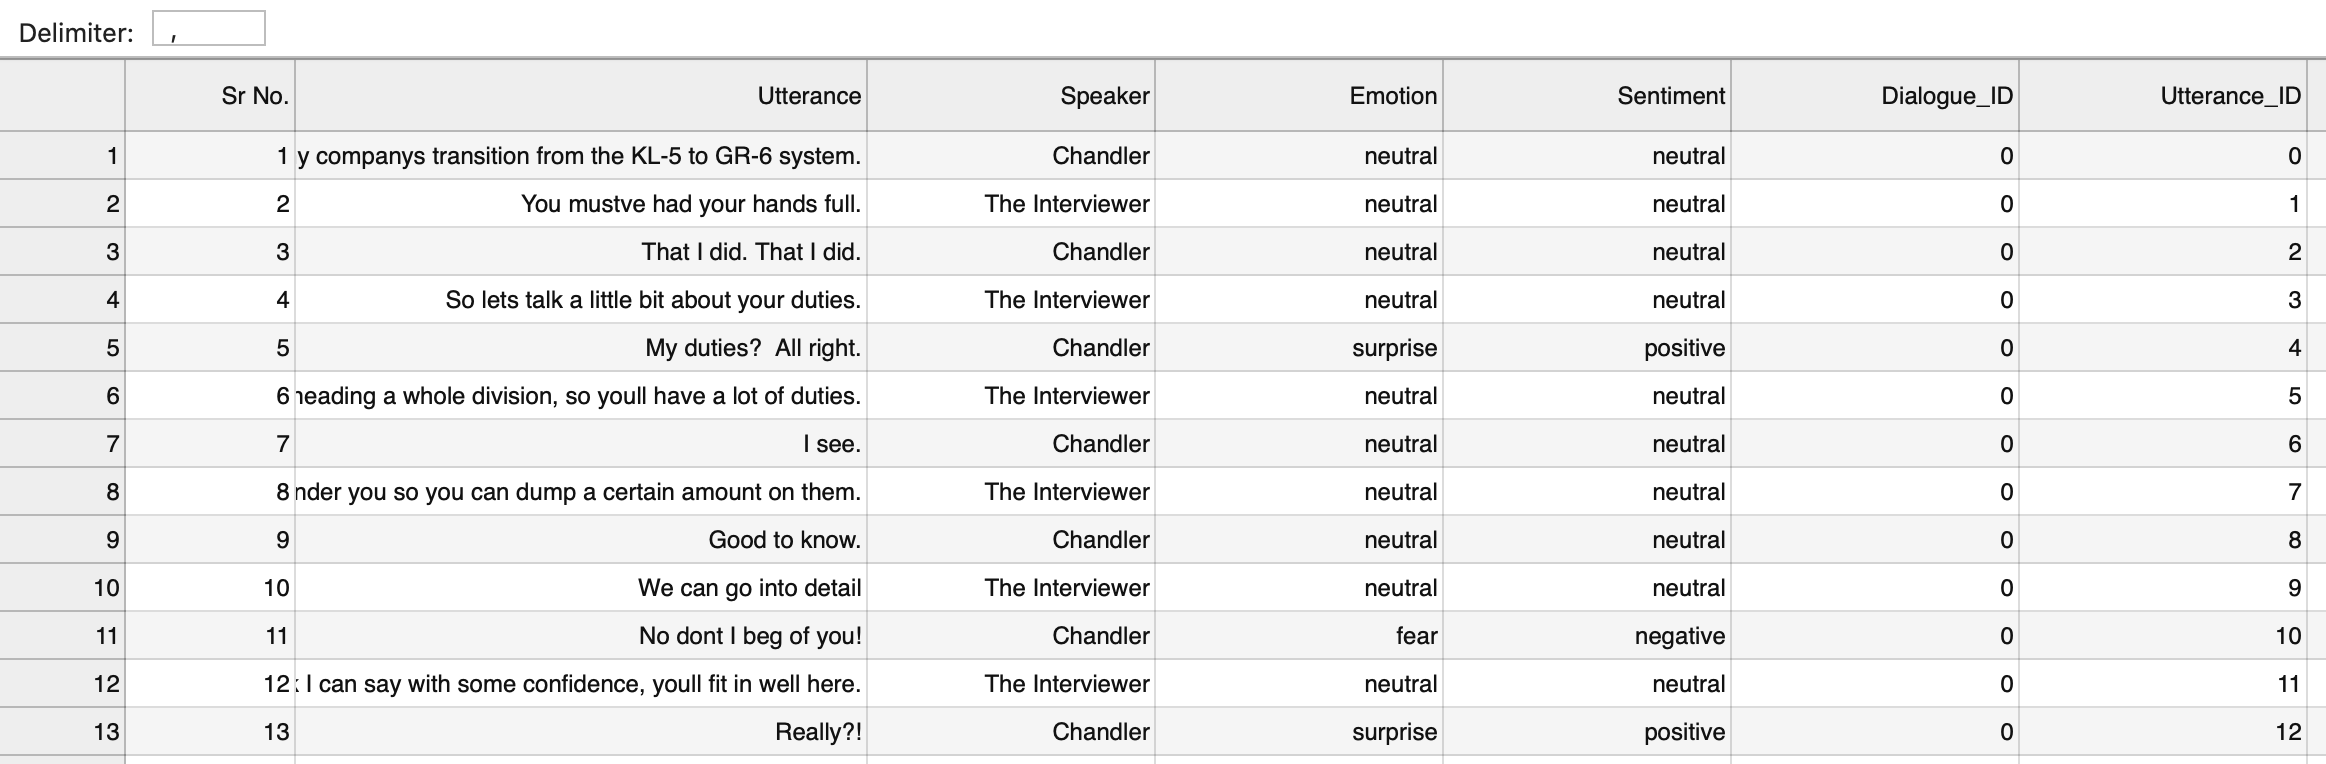

The first line shows the header. You see that the rows and columns with the data separated by the delimiter ",", which makes this a comma-separated-values or CSV file. You can scroll throug the table as in a file editor or spread sheet.

Opening a CSV. file in a notebook is a nice way to quickly get an idea about the content. We can see that there is a column with the utterances and columns for the emotion and the sentiment as annotations. We want to use the utterances and emotion columns for training a classifier to detect the emotion in any utterance. There are other columns as well, but we will ignore these in this notebook.

## 2. Using Pandas to load data <a class="anchor" id ="section2"></a> 

Instead of opening the data file in another TAB, we want to read the data from the file in the current notebook and feed it to the machine. The CSV file is a text file that you can read as any other text file. You could read it line by line and parse the columns to get the data. However, there is a very powerful package for loading data called `Pandas`  https://pandas.pydata.org, which we are going to use. Eventually, you may want to follow a tutorial on the web on how to use Pandas but for now you can simply follow the instructions below.

Pandas needs to be installed separately on your local machine first. You need to install it from the command line outside this notebook. As with other packages, make sure you install it within the same environment that you used to install Anaconda. Please follow the instructions to install pandas locally from the command line:

* >`conda install pandas`
* >`python -m pip install --upgrade pandas`

If the installation was succesful you can now import 'pandas' in this notebook. If Jupyter notebook does not know 'pandas', try restarting the kernel or even restarting Jupyter notebook.

In [ ]:
import pandas as pd

We imported pandas and created the instantiation 'pd'. We can now use 'pandas' functions and data elements through the variable 'pd'. Take your time to study the next bit of code so that you understand the individual steps. 
 
Our input file is located in the 'data' folder within this lab folder. We can therefore define the path to this file relative to this notebook. Next, we use the 'pd.read_csv' function to read the data from the file. This read function returns a so-called Dataframe object, which is the object that holds all the data in memory for further processing. We are going to assign this object as a value to the variable 'df'.

In [ ]:
filepath = './data/MELD/train_sent_emo.csv'
df = pd.read_csv(filepath)

There are two useful functions to inspect the data that we loaded in the dataframe 'df'. The 'df.info()' function gives us a technical overview of all the data, showing the columns names and order, the non-null cells per column and the data type per column. There are 9989 indexed rows and all cells have values. The 'df.head()' function show the content for head of the table. You can pass in a number for the range of rows you want to see.

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now youll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But therell be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


In a similar way, we can also inspect the tail.

In [ ]:
df.tail(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
9979,10469,How many perfectly fine women are you gonna re...,Monica,surprise,negative,1038,8,2,3,"00:00:28,319","00:00:32,573"
9980,10470,"Hold it, hold it.",Joey,neutral,neutral,1038,9,2,3,"0:00:32,824","0:00:33,456"
9981,10471,I gotta side with Chandler on this one.,Joey,neutral,neutral,1038,10,2,3,"0:00:33,456","0:00:35,556"
9982,10472,"When I first moved to the city, I went out a c...",Joey,disgust,negative,1038,11,2,3,"00:00:35,744","00:00:44,334"
9983,10473,It made me nuts.,Joey,disgust,negative,1038,12,2,3,"00:00:45,462","00:00:46,587"
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"
9988,10478,"That was a good one. For a second there, I was...",Joey,joy,positive,1038,17,2,3,"00:01:08,401","00:01:12,071"


## 3. Visualising the data <a class="anchor" id ="section3"></a> 

There are many ways and packages for visualising the data. Data visualisation is important because it may show biases or inspire baseline approaches. Data biases can make your system overfit to certain dominant classes and make it hard to detect rare cases. A baseline system is a solid and simple approach against which you want to compare your trained system. Possible baselines are to assign random classes as output or to always assign the most dominant class.

For visualising our data, we are using the matplotlib package, which we instantiate as 'plt'.

In [ ]:
import matplotlib.pyplot as plt

There are many options and functions you can use. We will show only a few here. First of all, you can set the size of figure that is used for the visualisation.

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
print('This is the default size:')
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 10
plot_size[1] = 8
print('We change it now to:')
print(plot_size[0]) 
print(plot_size[1])

plt.rcParams["figure.figsize"] = plot_size 

This is the default size:
6.0
4.0
We change it now to:
10
8


The dataframe function 'value_counts()' gives the statistics on the values for a column. We use it to get the stats for the Emotion column and use the matplotlib plot function to show as a pie-chart.

<AxesSubplot:ylabel='Emotion'>

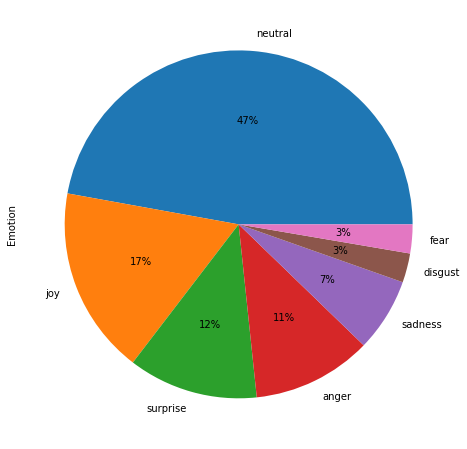

In [ ]:
df.Emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

Instead of a pie-chart, you can also use other visualisations such as a bar.

<AxesSubplot:>

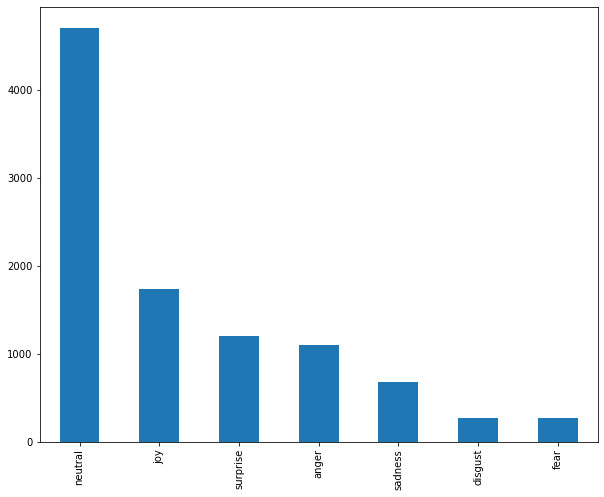

In [ ]:
df.Emotion.value_counts().sort_values(ascending=False).plot(kind='bar')

The visualisations show that 'neutral' is by far the dominant class in our training data and 'fear' as a label occurs the least. On the basis of these stats, we can already make our expectation for what a machine will learn from these data.

## 4. Iterating over a dataframe and getting the values we want <a class="anchor" id ="section3"></a> 

Instead of obtaining statistics and visualisations, we want to process the data rows one by one to get the values we need. In our case the utterances and the labels. The next *for*-loop shows you how you can iterate over a specific data segment, in this case the column 'Utterance' and get the *index* number for the row and the value assigned to the variable *utterance*. The Python function *enumerate* converts the column 'Utterance' into an iterable object so that we get the index number and the value.

We *break* the *for*-loop when the index number equals "10". 

In [ ]:
for index, utterance in enumerate(df['Utterance']):
    print(index, utterance)
    if index==10:
        break

0 also I was the point person on my companys transition from the KL-5 to GR-6 system.
1 You mustve had your hands full.
2 That I did. That I did.
3 So lets talk a little bit about your duties.
4 My duties?  All right.
5 Now youll be heading a whole division, so youll have a lot of duties.
6 I see.
7 But therell be perhaps 30 people under you so you can dump a certain amount on them.
8 Good to know.
9 We can go into detail
10 No dont I beg of you!


We see the indexes *0* to *10* and followed by the utterances from these rows. Using the index number, we can also get the Emotion label from the corresponding row. This is done through the *iloc* function.

In [ ]:
for index, utterance in enumerate(df['Utterance']):
    emotion_label = df['Emotion'].iloc[index]
    print(index, utterance,emotion_label) 
    if index==10:
        break

0 also I was the point person on my companys transition from the KL-5 to GR-6 system. neutral
1 You mustve had your hands full. neutral
2 That I did. That I did. neutral
3 So lets talk a little bit about your duties. neutral
4 My duties?  All right. surprise
5 Now youll be heading a whole division, so youll have a lot of duties. neutral
6 I see. neutral
7 But therell be perhaps 30 people under you so you can dump a certain amount on them. neutral
8 Good to know. neutral
9 We can go into detail neutral
10 No dont I beg of you! fear


We can see that most of our utterances are neutral but we also have one surprise and one fear. We will use the above *for*-loop to create the data for training a classifier.

## 5. Training classifiers with our data <a class="anchor" id ="section5"></a> 

In [ ]:
import pathlib
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
training_instances=[]
training_labels = []
for index, utterance in enumerate(df['Utterance']):
    ### We break the loop after 2000 instances 
    #if index==2000:
    #    break
    training_instances.append(utterance)
    training_labels.append(df['Emotion'].iloc[index])

print(len(training_instances))
print(len(training_labels))

9989
9989


### 5.1 Representing the text as numerical vectors <a class="anchor" id ="section5.1"></a> 

In [ ]:
# Turn utterances train data into a vector 
utterance_vec =CountVectorizer(min_df=5, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed


In [ ]:
utterance_counts = utterance_vec.fit_transform(training_instances)

/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


We have now created a vector representation of the complete vocabulary for the full data set. Every position in this vector represents a unique word token.

In [ ]:
#Total number of word features or the length of the total vector
print(len(utterance_vec.vocabulary_))

1149


In [ ]:
print(utterance_counts.shape)

(9989, 1149)


In [ ]:
# First 50 feature names
print(list(utterance_vec.get_feature_names())[:50])

['!', '$', "'", "''", "'cause", "'d", "'em", "'ll", "'m", "'re", "'s", "'ve", '(', ',', '--', '.', '..', '...', '10', '2', '25', '30', '40', '7', '8', ':', ';', '?', '``', 'able', 'absolutely', 'accident', 'across', 'actor', 'actual', 'actually', 'age', 'ago', 'ah', 'ahh', 'air', 'alan', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'although', 'always']


In [ ]:
# 'husband' is found in the corpus, mapped to index 489
utterance_vec.vocabulary_.get('husband')

487

We can convert the *utterance_counts* matrix to an array and get the first element and look at the vector values for slots 100 till 1000:

In [ ]:
print(utterance_counts.toarray()[1][10:1000])

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

We can see that most values are zero's and just a few have the value 1. This is what we call a sparse vector.

### 5.2 Representing text by the information value of the words <a class="anchor" id ="section5.2"></a> 

As we have seen in the previous Lab, we can also transform the counts into information value scores using the *TfidfTransformer* function.

The shape remains the same but the values are now scores between zero and one.

In [ ]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
utterance_tfidf = tfidf_transformer.fit_transform(utterance_counts)

In [ ]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
print(utterance_tfidf.shape)
print(utterance_tfidf.toarray()[1][10:1000])

(9989, 1149)
[0.         0.         0.         0.         0.         0.11550466
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

### 5.3 Training classifiers <a class="anchor" id ="section5.3"></a> 

We can now use the above data representation as training data to build a classifier. the Sklearn package already associated each row (a document) in our data represenation with a label by taking the name of the data subfolder.

In [ ]:
print(training_instances[10])
print(training_labels[10])

No dont I beg of you!
fear


Since machine learning algorithms have been designed to work with numeric data, we also need to convert the class labels to numeric valies. The sklearn package has a utility function *preprocessing* to convert the string labels to numerical values.

In [ ]:
from sklearn import preprocessing

# first we instantiate a label encode
label_encoder = preprocessing.LabelEncoder()
# we feed this encoder with the complete list of labels from our data
label_encoder.fit(training_labels)
print(list(label_encoder.classes_))


['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


We can see that we 7 different labels. We need to convert this list to numeric values raning from '0' to '6'. We use the *transform* function to do this.

In [ ]:
training_classes = label_encoder.transform(training_labels)
print(list(training_classes[0:20]))

[4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 2, 4, 6, 4, 6, 5, 6, 2, 4, 4]


Now we have numeric representations of our texts and numeric representations of our labels. We can feed these data to a classifier that is inlcuded in sklearn.

It is easy for machine learning package to read the above vector representations and associated these with any type of label. However, we also want to test the model with some data. For that purpose, we need to exclude part of the data from the training set.

To train the classifier, we will first split the data into train and test.

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

We choose 80% training and 20% test. 

In [ ]:
docs_train, docs_test, y_train, y_test = train_test_split(
    utterance_tfidf, # the tf-idf representation of the data
    training_classes, # the category values for each utterance represented as numeric values
    test_size = 0.20 # we use 80% for training and 20% for development
    ) 

One instance looks like this:

In [ ]:
print(docs_train[1].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


it's label is:

In [ ]:
y_train[1]

4

which we know is then:

In [ ]:
training_labels[1]

'neutral'

#### 5.3.1 Naive Bayes classifier <a class="anchor" id ="section5.3.1"></a> 

First, we are going to use a simple Naive Bayes classifier to train a model. Because we have multiple labels, we need a multinomial classifier as we are dealing with *7* classes.

In [ ]:
# Now ready to build a classifier. 
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB

The *fit* function of sklearn is the function we use to train the model and it takes as input the training data and the labels.

In [ ]:
# Train a Multimoda Naive Bayes classifier
mn_nb_clf = MultinomialNB().fit(docs_train, y_train)

After training the classifier, we can apply it to test data that is represented in the same way. For this we use the function *predict*

In [ ]:
# Predicting the Test set results, find macro recall
y_pred_nb = mn_nb_clf.predict(docs_test)

The predictions are a list of numeric values that represent the emotions. The values are listed in the order of the test data.

In [ ]:
print('Predictions from the NB classifer', y_pred_nb)

Predictions from the NB classifer [4 4 4 ... 4 4 4]


#### 5.3.2 Support Vector Machine classifier <a class="anchor" id ="section5.3.2"></a> 

You can easily choose another classifier in sklearn and feed it with exactly the same data. We next are going to use a Support Vector Machine classifier, which was one of the most effective classifiers before the Deep Learning paradignm.

In [ ]:
from sklearn import svm

svm_linear_clf = svm.LinearSVC()
svm_linear_clf.fit(docs_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# Predicting the Test set results, find macro recall
y_pred_svm = svm_linear_clf.predict(docs_test)

In [ ]:
print('Predictions from the SVM classifier', y_pred_svm)

Predictions from the SVM classifier [4 5 3 ... 4 6 4]


### 5.4 Evaluating the performance of a classifier <a class="anchor" id ="section5.4"></a> 

Sklearn provides functions to obtain the recall, precision and f-measure for the test set that we split of from the training data. To do this, we only need to provide the true values of the test set and the list of predicted values and pass it to the *sklearn.metrics* functions to compute the precision, recall and f-score. You can see in the functions below that these functions have parameters for *y_true*, *y_pred* and the way of averaging. We pass *y_test*, which is the list of emotions from the data set, as the value for *y_true*, and we pass *pred_nb* as the list of emotions that is predicted by the NaiveBayes classifier as a value for *y_pred*. We choose *micro_averaging* to aggregate the scores from the different emotions.

In [ ]:
nb_micro_recall= sklearn.metrics.recall_score(y_true=y_test,
                             y_pred=y_pred_nb,
                             average='micro')


print('NB recall', nb_micro_recall)

NB recall 0.5375375375375375


We can see here that the NB classifier has an average recall of 0.54, which is not very good.

We can make a similar call for the predictions from the SVM classifier by assigning the values *y_pred_svm* to the parameter *y_pred*.

In [ ]:
svm_micro_recall= sklearn.metrics.recall_score(y_true=y_test,
                             y_pred=y_pred_svm,
                             average='micro')

print('SVM recall', svm_micro_recall)

SVM recall 0.5470470470470471


The SVM scores a little bit higher but still not good enough. Let's see what the precision and f-scores are. For this we replace *recall_score* with *precision_score* and *f1_score* respectively.


In [ ]:
nb_micro_precision= sklearn.metrics.precision_score(y_true=y_test,
                             y_pred=y_pred_nb,
                             average='micro')

svm_micro_precision= sklearn.metrics.precision_score(y_true=y_test,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB precision', nb_micro_precision)
print('SVM precision', svm_micro_precision)

NB precision 0.5375375375375375
SVM precision 0.5470470470470471


In [ ]:
nb_micro_f_score= sklearn.metrics.f1_score(y_true=y_test,
                             y_pred=y_pred_nb,
                             average='micro')
svm_micro_f_score= sklearn.metrics.f1_score(y_true=y_test,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB f-score', nb_micro_f_score)
print('SVM f-score', svm_micro_f_score)

NB f-score 0.5375375375375375
SVM f-score 0.5470470470470471


Recall, precision and f1 scores are the same. Let's see what happens if we use *macro averaging*.

In [ ]:
nb_macro_f_score= sklearn.metrics.f1_score(y_true=y_test,
                             y_pred=y_pred_nb,
                             average='macro')
svm_macro_f_score= sklearn.metrics.f1_score(y_true=y_test,
                             y_pred=y_pred_svm,
                             average='macro')

print('NB f-score', nb_macro_f_score)
print('SVM f-score', svm_macro_f_score)

NB f-score 0.21759633759752797
SVM f-score 0.30889739809439337


Why is the macro average score so much lower than the micro average score? Think about the distribution of the emotions labels.

Instead of the averaged results, sklearn can also generate a report per model

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred_nb,digits = 7)
print(label_encoder.classes_)
print('NB  ----------------------------------------------------------------')
print(report)

report = classification_report(y_test,y_pred_svm,digits = 7)
print(label_encoder.classes_)
print('SVM ----------------------------------------------------------------')
print(report)

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
NB  ----------------------------------------------------------------
              precision    recall  f1-score   support

           0  0.2307692 0.0271493 0.0485830       221
           1  0.0000000 0.0000000 0.0000000        53
           2  0.0000000 0.0000000 0.0000000        55
           3  0.5864198 0.2653631 0.3653846       358
           4  0.5278592 0.9667025 0.6828528       931
           5  1.0000000 0.0075188 0.0149254       133
           6  0.6990291 0.2914980 0.4114286       247

    accuracy                      0.5375375      1998
   macro avg  0.4348682 0.2226045 0.2175963      1998
weighted avg  0.5295473 0.5375375 0.4408851      1998

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
SVM ----------------------------------------------------------------
              precision    recall  f1-score   support

           0  0.3006993 0.1945701 0.2362637       221
           1  0.1176471 0.03

/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the performance varies a lot across the emotions and across the classifiers. E.g. *anger* and *surprise* have highest precision for NB but not for SVM. SVM has for most emotions a higher recall and the averaged results and the f1 scores are higher for SVM.

We can also inspect the least and most important features per category.

In [ ]:
def important_features_per_class(vectorizer,classifier,n=20): #n is the number of top features
    class_labels = label_encoder.classes_
    feature_names =vectorizer.get_feature_names()
    #['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
    topn_anger = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_disgust= sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    topn_fear = sorted(zip(classifier.feature_count_[2], feature_names),reverse=True)[:n]
    topn_joy = sorted(zip(classifier.feature_count_[3], feature_names),reverse=True)[:n]
    topn_neutral = sorted(zip(classifier.feature_count_[4], feature_names),reverse=True)[:n]
    topn_sad = sorted(zip(classifier.feature_count_[5], feature_names),reverse=True)[:n]
    topn_surprise = sorted(zip(classifier.feature_count_[6], feature_names),reverse=True)[:n]
    print("Important words in anger utterances")
    for coef, feat in topn_anger:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in disgust utterances")
    for coef, feat in topn_disgust:
        print(class_labels[1], coef, feat) 
    print("-----------------------------------------")
    print("Important words in fear utterances")
    for coef, feat in topn_fear:
        print(class_labels[2], coef, feat)
    print("-----------------------------------------")
    print("Important words in joy utterances")
    for coef, feat in topn_joy:
        print(class_labels[3], coef, feat) 

    print("-----------------------------------------")
    print("Important words in neutral utterances")
    for coef, feat in topn_neutral:
        print(class_labels[4], coef, feat) 

    print("-----------------------------------------")
    print("Important words in sad utterances")
    for coef, feat in topn_sad:
        print(class_labels[5], coef, feat) 

    print("-----------------------------------------")
    print("Important words in surprise utterances")
    for coef, feat in topn_surprise:
        print(class_labels[6], coef, feat) 

In [ ]:
print('Most important features per emotion for the NB classifier')
important_features_per_class(utterance_vec, mn_nb_clf)

Most important features per emotion for the NB classifier
Important words in anger utterances
anger 179.32563626269166 !
anger 73.78966374897865 ,
anger 55.27244686853737 ?
anger 44.30181350794276 .
anger 20.802540801588552 oh
anger 20.58058760518952 n't
anger 19.505617921187557 dont
anger 18.60053302347774 okay
anger 17.748534164959462 get
anger 17.38071168719395 's
anger 15.422600931858215 hey
anger 14.953793981603646 im
anger 14.90507603244015 go
anger 14.512568932810915 well
anger 14.171872103544114 right
anger 13.34453409605541 na
anger 12.623182483552682 come
anger 12.369009658350391 gon
anger 12.334108228116625 cant
anger 12.012764528758451 look
-----------------------------------------
Important words in disgust utterances
disgust 30.944160233029052 !
disgust 23.51006645705733 ,
disgust 22.545030892403453 .
disgust 10.60481424691868 ?
disgust 9.357081072335744 oh
disgust 8.317896834494823 's
disgust 6.0943246680172525 yeah
disgust 5.55856019520061 n't
disgust 4.7855652392362

Such a feature analysis can be very useful for improving the classifier. You can easily see that certain features are not very distriminative or predictive for the correct emotion because they score high for all different emotions.

Think a few minutes about different ways to improve the features.

Unfortunately, we cannot apply this simple function to our SVM classifier as it does not come with the function *feature_count_*. Therefore we have to create another tailored function for this model. 

In [ ]:
def f_importances(importances, names, n=20):
    class_labels = label_encoder.classes_
    
    for num, imp in enumerate(importances):
        emotion = class_labels[num]
        topn = sorted(zip(imp,names), reverse=True)[:n]
        
        print("Important words in {} utterances".format(emotion))
        for coef, feat in topn:
            print(emotion, coef, feat)
        print("-----------------------------------------")

In [ ]:
print('Most important features per emotion for the SVM classifier')
feature_names =utterance_vec.get_feature_names()
f_importances(svm_linear_clf.coef_, feature_names)

Most important features per emotion for the SVM classifier
Important words in anger utterances
anger 1.9942402899062754 instead
anger 1.9229383917853407 inappropriate
anger 1.7777105188660653 killed
anger 1.7490663439632326 mad
anger 1.4884851015404847 blew
anger 1.4600019058572173 words
anger 1.4495303644794648 wife
anger 1.4251887039697695 bitch
anger 1.4225182792646636 calm
anger 1.399852123733513 worst
anger 1.3694849644649998 york
anger 1.3514618031449404 jerk
anger 1.3440641486093898 outta
anger 1.3292993835349458 listening
anger 1.305225560573654 relationship
anger 1.2975815933163 invited
anger 1.2634641543087737 easier
anger 1.2421454763850626 started
anger 1.2412730893111381 crap
anger 1.231514398098862 rooms
-----------------------------------------
Important words in disgust utterances
disgust 2.0347497462419804 boat
disgust 1.7787287730050505 ugh
disgust 1.761441713304886 hate
disgust 1.4971947026629768 bug
disgust 1.474180297528427 worse
disgust 1.4678766128532141 pig
disg

## 6. Applying a classifier to your own text

Now we can apply our classifier to new data. We represent our text as a list of sentences. You can see it is easy to make up your own text or to load it from a file.

In [ ]:
# some utterances
some_chat = ['That is sweet of you', 
               'You are so funny', 
               'Are you a man or a woman?', 
               'Chatbots make me sad and feel lonely.', 
               'Your are stupid and boring.', 
               'Two thumbs up', 
               'I fell asleep halfway through this conversation', 
               'Wow, I am really amazed.', 
               'You are amazing.']
len(some_chat)

9

It is important to realise that our classifier is trained with words as features that are derived from the training data. Our data may contain words that do not occur in the training data. Remember that we created large vectors. 

To be able to apply our model to these text, we need to represent the text using the same vectors as we used for training the model. The sklearn transformer function does this work for you.

In [ ]:
# We re-use utterance_vec to transform it in the same way as the training data
new_counts = utterance_vec.transform(some_chat)
new_counts.shape

(9, 1149)

Note that words in our new utterances that are NOT in the training data, will not be represented as there are no slots in the vectors from the training data.

In [ ]:
# we compute tf idf values
some_chat_tfidf = tfidf_transformer.transform(new_counts)
some_chat_tfidf.shape

(9, 1149)

In [ ]:
# have classifier make a prediction
pred = svm_linear_clf.predict(some_chat_tfidf)

In [ ]:
# print out results ()
for review, predicted_label in zip(some_chat, pred):
    
    print('%s => %s' % (review, 
                        label_encoder.classes_[predicted_label]))

That is sweet of you => joy
You are so funny => joy
Are you a man or a woman? => anger
Chatbots make me sad and feel lonely. => sadness
Your are stupid and boring. => neutral
Two thumbs up => neutral
I fell asleep halfway through this conversation => neutral
Wow, I am really amazed. => surprise
You are amazing. => joy


## 7. Reusing your model and classifier in another program

In [ ]:
import pickle

# save the countvectorizer
filename_vectorizer = 'utterance_vec.sav'
pickle.dump(utterance_vec, open(filename_vectorizer, 'wb'))

# save the tfidf transformer
filename_transformer = 'utterance_transf.sav'
pickle.dump(tfidf_transformer, open(filename_transformer, 'wb'))

# save the label encoder
filename_encoder = 'label_encoder.sav'
pickle.dump(label_encoder, open(filename_encoder, 'wb'))

# save the classifier to disk
filename_classifier = 'svm_linear_clf.sav'
pickle.dump(svm_linear_clf, open(filename_classifier, 'wb'))
 
# some time later...
 
# load the classifier and the vectorizer from disk
loaded_classifier = pickle.load(open(filename_classifier, 'rb'))
loaded_vectorizer = pickle.load(open(filename_vectorizer, 'rb'))
loaded_transformer = pickle.load(open(filename_transformer, 'rb'))
loaded_label_encoder = pickle.load(open(filename_encoder, 'rb'))


counts_from_loaded_model = loaded_vectorizer.transform(some_chat)
some_chat_tfidf = loaded_transformer.transform(counts_from_loaded_model)
pred_from_loaded_classifier = loaded_classifier.predict(some_chat_tfidf)

for review, predicted_label in zip(some_chat, pred_from_loaded_classifier):
    print('%s => %s' % (review, 
                        loaded_label_encoder.classes_[predicted_label]))

That is sweet of you => joy
You are so funny => joy
Are you a man or a woman? => anger
Chatbots make me sad and feel lonely. => sadness
Your are stupid and boring. => neutral
Two thumbs up => neutral
I fell asleep halfway through this conversation => neutral
Wow, I am really amazed. => surprise
You are amazing. => joy


/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# End of this notebook